In [3]:
import os
import pandas as pd

# Load all text files from subfolders
data_folder = "data"

# Store {folder_name: [file_contents]}
data_dict = {}

for folder in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder)
    if os.path.isdir(folder_path):
        documents = []
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        documents.append(f.read())
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
        if documents:
            data_dict[folder] = documents

# Create DataFrame (each column = a folder, each row = a document)
df = pd.DataFrame.from_dict(data_dict, orient='index').T
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (1000, 20)


,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...,Xref: cantaloupe.srv.cs.cmu.edu comp.archives....,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.m...,Xref: cantaloupe.srv.cs.cmu.edu comp.lang.c:65...,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,Newsgroups: rec.sport.hockey\nPath: cantaloupe...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Newsgroups: sci.electronics\nPath: cantaloupe....,Newsgroups: sci.med\nPath: cantaloupe.srv.cs.c...,Xref: cantaloupe.srv.cs.cmu.edu sci.space:5949...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Newsgroups: talk.politics.mideast\nPath: canta...,Xref: cantaloupe.srv.cs.cmu.edu alt.news-media...,Newsgroups: talk.religion.misc\nPath: cantalou...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.lang.c:65...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Newsgroups: rec.autos\nPath: cantaloupe.srv.cs...,Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycle...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Newsgroups: rec.sport.hockey\nPath: cantaloupe...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Xref: cantaloupe.srv.cs.cmu.edu rec.radio.swap...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3390...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Xref: cantaloupe.srv.cs.cmu.edu alt.folklore.u...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,Newsgroups: talk.religion.misc\nPath: cantalou...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu rec.autos:1015...,Newsgroups: rec.motorcycles\nPath: cantaloupe....,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Newsgroups: sci.electronics\nPath: cantaloupe....,Xref: cantaloupe.srv.cs.cmu.edu rec.nude:15823...,Xref: cantaloupe.srv.cs.cmu.edu sci.space:5984...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,Xref: cantaloupe.srv.cs.cmu.edu comp.human-fac...,Newsgroups: comp.os.ms-windows.misc\nPath: can...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...,Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...,Newsgroups: misc.forsale\nPath: cantaloupe.srv...,Xref: cantaloupe.srv.cs.cmu.edu rec.autos:1015...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Newsgroups: sci.electronics\nPath: cantaloupe....,Xref: ca

# Preprocess & Vectorize Text

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all text into a single list (handling NaNs)
all_documents = []
for column in df.columns:
    all_documents.extend(df[column].dropna().tolist())

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(
    max_features=1000,      # Limit vocabulary size
    stop_words='english',   # Remove common words
    lowercase=True          # Case normalization
)
X = vectorizer.fit_transform(all_documents)
print(f"Vectorized shape: {X.shape} (documents x features)")

Vectorized shape: (19997, 1000) (documents x features)


# Find Optimal Clusters (Elbow Method)

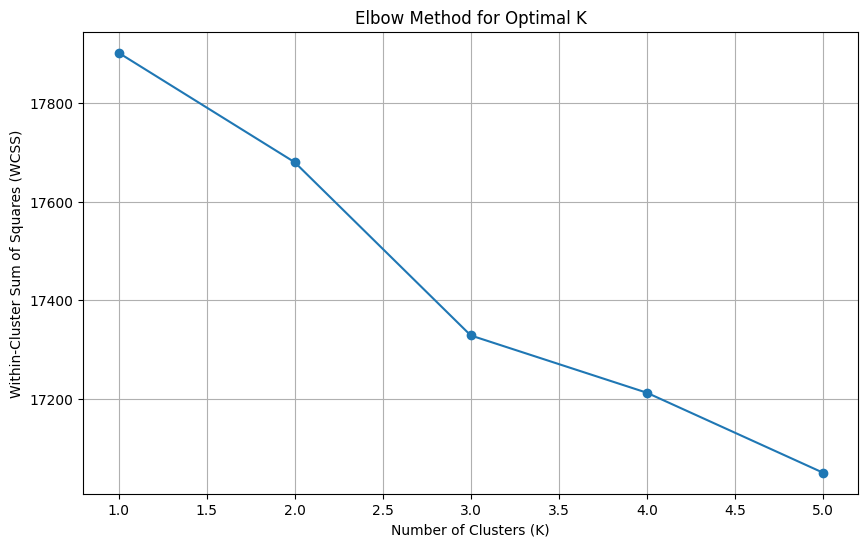

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test different K values
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

#  Apply K-Means Clustering

In [64]:
# Choose K based on the elbow plot
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Create results DataFrame
results = pd.DataFrame({
    'Document': all_documents,
    'Cluster': clusters
})
print(f"Clustered {len(results)} documents into {k} groups")
results.head()

Clustered 19997 documents into 3 groups


,Document,Cluster
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,1
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1


# Visualize Clusters (PCA)

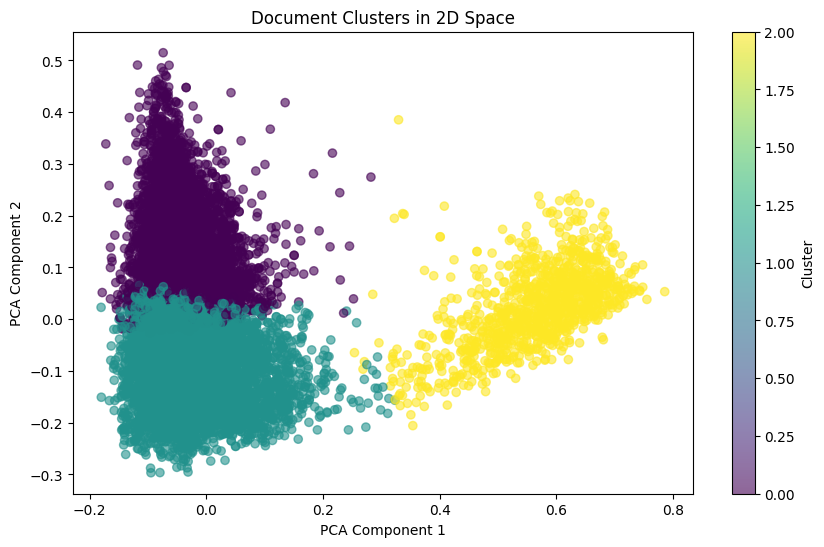

In [67]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
coordinates = pca.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    coordinates[:, 0], 
    coordinates[:, 1], 
    c=clusters, 
    cmap='viridis',
    alpha=0.6
)
plt.title('Document Clusters in 2D Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Interpret Clusters

In [30]:
# Top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("Top terms per cluster:")
for i in range(k):
    print(f"\nCluster {i}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))  # Top 10 words

# Sample documents from each cluster
for cluster in range(k):
    print(f"\n--- Sample from Cluster {cluster} ---")
    sample = results[results['Cluster'] == cluster].sample(2)
    for idx, row in sample.iterrows():
        print(f"\nDocument {idx}:\n{row['Document'][:200]}...")  # First 200 chars

Top terms per cluster:

Cluster 0:
edu, cmu, state, news, ohio, cs, com, srv, cc, net

Cluster 1:
edu, uiuc, space, nasa, cso, sci, gov, cmu, news, digex

Cluster 2:
edu, talk, politics, culture, soc, misc, com, alt, cmu, cs

Cluster 3:
sandvik, mchp, sni, sgi, apple, ap, com, horus, edu, frank

Cluster 4:
edu, comp, sys, mac, ibm, hardware, com, pc, cmu, au

Cluster 5:
com, edu, ca, cmu, cs, news, net, hp, org, rec

Cluster 6:
windows, edu, uk, ac, comp, os, ms, com, cmu, cs

Cluster 7:
rutgers, christian, edu, athos, geneva, god, religion, soc, igor, hedrick

--- Sample from Cluster 0 ---

Document 7636:
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!ub!dsinc!vu-vlsi.ee.vill.edu!mobasser
From: mobasser@vu-vlsi.e...

Document 12255:
Newsgroups: sci.electronics
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu

# Advanced Cluster Analysis

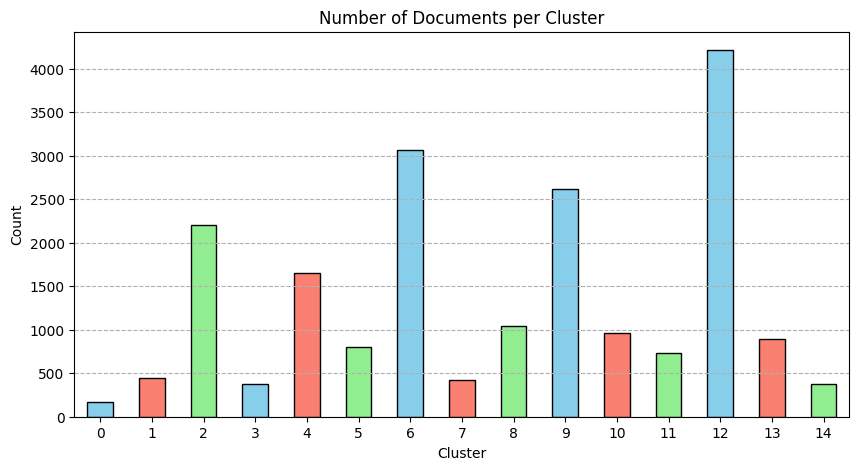

In [38]:
# Visualize cluster sizes
plt.figure(figsize=(10, 5))
results['Cluster'].value_counts().sort_index().plot(
    kind='bar',
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)
plt.title('Number of Documents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()